# 서울여의도불꽃축제 관람을 위한 여의도 주변 이동량 분석

In [2]:
import pandas as pd

df_location = pd.read_csv('data/location_code.csv')
df_location.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [3]:
# 필요없는 열 삭제
df_location = df_location.drop(columns=['생성일자', '말소일자'])

## 서울세계불꽃축제 방문자 수 계산

In [5]:
# 불꽃축제가 포함된 일주일 기간 비교하여 방문객 수 분석
df_stay_1003 = pd.read_csv('data/stay_20231001_15/stay_20231003_1.csv')
df_stay_1004 = pd.read_csv('data/stay_20231001_15/stay_20231004_1.csv')
df_stay_1005 = pd.read_csv('data/stay_20231001_15/stay_20231005_1.csv')
df_stay_1006 = pd.read_csv('data/stay_20231001_15/stay_20231006_1.csv')
df_stay_1007 = pd.read_csv('data/stay_20231001_15/stay_20231007_1.csv')
df_stay_1008 = pd.read_csv('data/stay_20231001_15/stay_20231008_1.csv')
df_stay_1009 = pd.read_csv('data/stay_20231001_15/stay_20231009_1.csv')

df_stay_week = pd.concat([df_stay_1003, df_stay_1004, df_stay_1005, df_stay_1006, 
                          df_stay_1007, df_stay_1008, df_stay_1009], ignore_index=True)

In [6]:
df_stay_1007.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts
0,4115056800,20231007,15:00,1,7,0,832
1,4611074500,20231007,22:00,1,5,0,1351
2,4711158000,20231007,21:00,1,2,0,981
3,2729053500,20231007,19:00,0,3,0,939
4,4113353000,20231007,22:00,1,2,0,1248


In [7]:
# 여의동 부근 행정동 코드 반환
location_list = ['여의', '이촌', '합정', '당인', '신수', '용강', '도화', '원효로', '서강', '당산']

def get_location_code(df_location, location_list):
    df_location_visit = pd.DataFrame()

    # 각 지역명으로 필터링하고 결과를 합침
    for location in location_list:
        filtered_data = df_location[
            ((df_location['시도명'] == '서울특별시') & df_location['읍면동명'].str.contains(location, na=False)) |
            ((df_location['시도명'] == '서울특별시') & df_location['동리명'].str.contains(location, na=False))]
        
        df_location_visit = pd.concat([df_location_visit, filtered_data], ignore_index=True)
        
    return df_location_visit

df_location_visit = get_location_code(df_location, location_list)
df_location_visit.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명
0,1156054000,서울특별시,영등포구,여의동,1156011000,여의도동
1,1117063000,서울특별시,용산구,이촌제1동,1117012900,이촌동
2,1117064000,서울특별시,용산구,이촌제2동,1117012900,이촌동
3,1144068000,서울특별시,마포구,합정동,1144012200,합정동
4,1144065500,서울특별시,마포구,서강동,1144011800,당인동


In [8]:
target_code = df_location_visit[['행정동코드', '법정동코드']].values.tolist() # 코드 값 가져오기

In [9]:
# 위치 코드가 여의동에 해당하는 경우 필터링
import numpy as np

def get_target_data(df, target_code, code_col, purpose_col):
    target_array = np.array(target_code)
    
    # 행정동코드나 법정동코드와 일치하는지 확인
    target_df = df[df[code_col].apply(lambda x: x in target_array[:, 0] or x in target_array[:, 1])]

    # 방문 목적이 3(쇼핑여가), 5(여행)인 경우 필터링
    target_df = target_df[target_df[purpose_col].isin([3, 5])]
    
    return target_df

In [10]:
# 10월 7일 여의도 체류 인원 데이터
target_stay_1007 = get_target_data(df_stay_1007, target_code, 'hdong_cd', 'purpose')
target_stay_1007.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts
322,1156054000,20231007,13:00,0,1,5,2039
1081,1144058500,20231007,18:00,0,3,3,924
1422,1144068000,20231007,20:00,1,0,5,748
3492,1117064000,20231007,19:00,0,0,5,1350
5232,1144065500,20231007,20:00,1,2,5,927


In [11]:
# 여의도 체류 인원 데이터
target_stay = get_target_data(df_stay_week, target_code, 'hdong_cd', 'purpose')
target_stay.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts
1211,1156054000,20231003,15:00,0,0,3,684
2801,1156054000,20231003,14:00,1,1,3,1228
3379,1156054000,20231003,17:00,0,3,3,1821
3893,1144065500,20231003,19:00,0,2,3,699
4241,1156054000,20231003,19:00,1,3,3,1824


In [12]:
stay_week_counts = target_stay.groupby('date')['stay_cnts'].sum().reset_index()
stay_week_counts['date'] = pd.to_datetime(stay_week_counts['date'], format='%Y%m%d')
stay_week_counts

,date,stay_cnts
0,2023-10-03,627149
1,2023-10-04,610622
2,2023-10-05,670289
3,2023-10-06,724616
4,2023-10-07,1985862
5,2023-10-08,907618
6,2023-10-09,659113


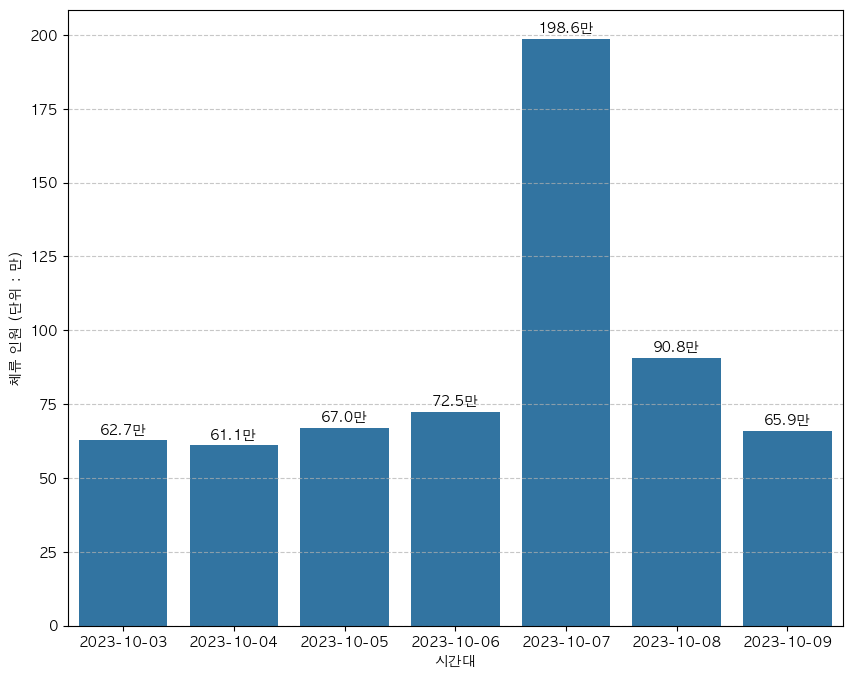

In [129]:
# 시간대별 체류 인원 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10, 8))

# 막대 그래프 그리기
sns.barplot(x=stay_week_counts['date'], y=stay_week_counts['stay_cnts'] / 10000)

# 인원 수 표시
for index, value in enumerate(stay_week_counts['stay_cnts']):
    plt.text(index, value / 10000 + 1, f'{value / 10000:.1f}만', ha='center', va='bottom', color='black')

plt.xlabel('시간대')
plt.ylabel('체류 인원 (단위 : 만)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 그래프 저장
plt.savefig('일주일 체류인원.png', dpi=300, bbox_inches='tight')
plt.show()

=> 축제 장소인 여의도 인근의 체류 인원은 평상시의 약 3배임

=> 100만 명 이상 방문한 것으로 추정할 수 있음

## 1. 축제 장소로의 이동 경로 분석 (od 데이터)

In [16]:
# 2023년 10월 7일 이동량 데이터
df_od_1007 = pd.read_csv('data/od_20231001_15/od_20231007_1.csv')
df_od_1007.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1135064000,1135069500,20231007,19:00,19:00,1,2,0.0,4.0,4,11015,16,17
1,5013061000,5013031000,20231007,15:00,16:00,0,4,0.0,5.0,5,43766,38,7
2,3611052000,3611038000,20231007,10:00,13:00,0,1,0.0,0.0,4,42424,194,7
3,4111158000,4111568000,20231007,16:00,16:00,0,4,0.0,0.0,0,2999,3,6
4,4315025000,4315056000,20231007,14:00,14:00,1,0,1.0,4.0,0,13222,10,11


### 1) 도착지가 서울 여의동이면서 방문 목적이 '쇼핑여가'나 '여행'인 데이터 필터링

In [18]:
# 여의도 주변 이동량 데이터
target_od = get_target_data(df_od_1007, target_code, 'dest_hdong_cd', 'dest_purpose')
target_od.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
186,1144066000,1144068000,20231007,18:00,20:00,1,2,0.0,5.0,5,40620,100,9
471,1129061000,1144058500,20231007,13:00,14:00,1,0,0.0,0.0,3,32716,79,30
498,1144059000,1117057000,20231007,19:00,20:00,1,1,0.0,3.0,3,45789,60,8
749,1117064000,1117063000,20231007,18:00,18:00,1,4,0.0,5.0,5,3926,6,7
921,1156054000,1144058500,20231007,20:00,21:00,1,4,1.0,3.0,3,38561,32,8


### 2) 출발지를 분석하여 어느 지역에서 사람들이 많이 왔는지 파악

In [20]:
origin_location_code_list = target_od[['origin_hdong_cd', 'od_cnts']]
origin_location_code_list

,origin_hdong_cd,od_cnts
186,1144066000,9
471,1129061000,30
498,1144059000,8
749,1117064000,7
921,1156054000,8
...,...,...
3549790,1141058500,5
3550388,1144058500,5
3551432,4117362000,5
3551765,1156060500,5


In [21]:
def get_location(df_location, location_code_list):
    # 지역명 목록 초기화
    origin_location_list = []
    dest_location_list = []

    # 'origin_hdong_cd' 열이 존재하는 경우 처리
    if 'origin_hdong_cd' in location_code_list.columns:
        for i in location_code_list['origin_hdong_cd']:
            # 행정동코드 또는 법정동코드가 일치하는 지역명 찾기
            matched_locations = df_location[(df_location['행정동코드'] == i) | (df_location['법정동코드'] == i)]
            
            # 지역명 추출
            location = matched_locations['시도명'].values[0] if not matched_locations.empty else None
            origin_location_list.append(location)

    # 'dest_hdong_cd' 열이 존재하는 경우 처리
    if 'dest_hdong_cd' in location_code_list.columns:
        for i in location_code_list['dest_hdong_cd']:
            # 행정동코드 또는 법정동코드가 일치하는 지역명 찾기
            matched_locations = df_location[(df_location['행정동코드'] == i) | (df_location['법정동코드'] == i)]
            
            # 지역명 추출
            location = matched_locations['시도명'].values[0] if not matched_locations.empty else None
            dest_location_list.append(location)

    # 지역명 할당
    if 'origin_hdong_cd' in location_code_list.columns:
        location_code_list = location_code_list.copy()  # 복사본 생성
        location_code_list['origin_location_name'] = origin_location_list
        
    if 'dest_hdong_cd' in location_code_list.columns:
        location_code_list = location_code_list.copy()  # 복사본 생성
        location_code_list['dest_location_name'] = dest_location_list
    
    return location_code_list

In [22]:
# 출발지위치 반환
origin_location = get_location(df_location, origin_location_code_list)
origin_location

,origin_hdong_cd,od_cnts,origin_location_name
186,1144066000,9,서울특별시
471,1129061000,30,서울특별시
498,1144059000,8,서울특별시
749,1117064000,7,서울특별시
921,1156054000,8,서울특별시
...,...,...,...
3549790,1141058500,5,서울특별시
3550388,1144058500,5,서울특별시
3551432,4117362000,5,경기도
3551765,1156060500,5,서울특별시


In [23]:
# 출발지별 이동인원 누적 합산
origin_location_sum = origin_location.groupby('origin_location_name')['od_cnts'].sum().reset_index()
origin_location_sum

,origin_location_name,od_cnts
0,강원특별자치도,396
1,경기도,21894
2,경상남도,98
3,경상북도,119
4,광주광역시,147
5,대구광역시,236
6,대전광역시,213
7,부산광역시,23
8,서울특별시,83325
9,세종특별자치시,271


In [24]:
location_mapping = {
    '서울특별시': '서울',
    '경기도': '경기',
    '인천광역시': '인천',
    '충청남도': '충남',
    '충청북도': '충북',
    '강원특별자치도': '강원',
    '대전광역시': '대전',
    '대구광역시': '대구',
    '부산광역시': '부산',
    '광주광역시': '광주',
    '세종특별자치시': '세종',
    '전라북도': '전북',
    '경상북도': '경북',
    '전라남도': '전남',
    '경상남도': '경남',
    '제주특별자치도': '제주'
}

origin_location_sum['origin_location_name'] = origin_location_sum['origin_location_name'].replace(location_mapping)

# od_cnts를 기준으로 내림차순 정렬
origin_location_sum = origin_location_sum.sort_values(by='od_cnts', ascending=False).reset_index(drop=True)
origin_location_sum

,origin_location_name,od_cnts
0,서울,83325
1,경기,21894
2,인천,3601
3,충남,705
4,강원,396
5,충북,339
6,세종,271
7,대구,236
8,대전,213
9,광주,147


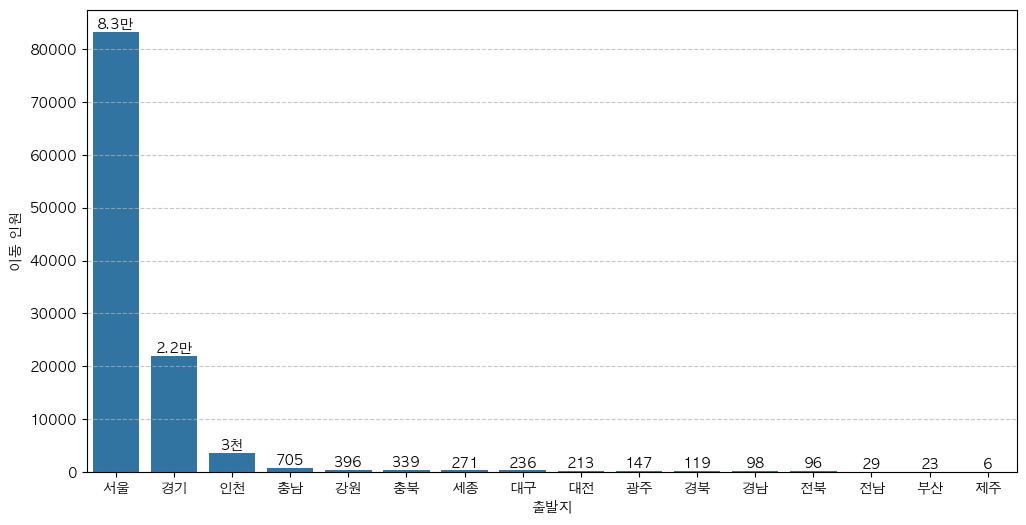

In [135]:
plt.figure(figsize=(12, 6))

for index, value in enumerate(origin_location_sum['od_cnts']):
    if value >= 10000:
        plt.text(index, value, f'{value / 10000:.1f}만', ha='center', va='bottom', color='black')
    elif value >= 1000:
        plt.text(index, value, f'{int(value / 1000)}천', ha='center', va='bottom', color='black')
    else:
        plt.text(index, value, f'{int(value)}', ha='center', va='bottom', color='black')

plt.xlabel('출발지')
plt.ylabel('이동 인원')
sns.barplot(x=origin_location_sum['origin_location_name'], y=origin_location_sum['od_cnts'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig('이동량 순위.png', dpi=300, bbox_inches='tight')
plt.show()

=> 서울, 경기, 인천, 충남 순으로 이동량이 많음

### 3) 어느 시간대에 가장 많이 방문하는지 파악

In [28]:
# 시간대별 방문 횟수 집계
visit_counts = target_od.groupby('end_time')['od_cnts'].sum().reset_index()

# 시간대를 "00:00" 형식에서 "00시" 형식으로 변경
visit_counts['end_time'] = pd.to_datetime(visit_counts['end_time'], format='%H:%M').dt.strftime('%H시')

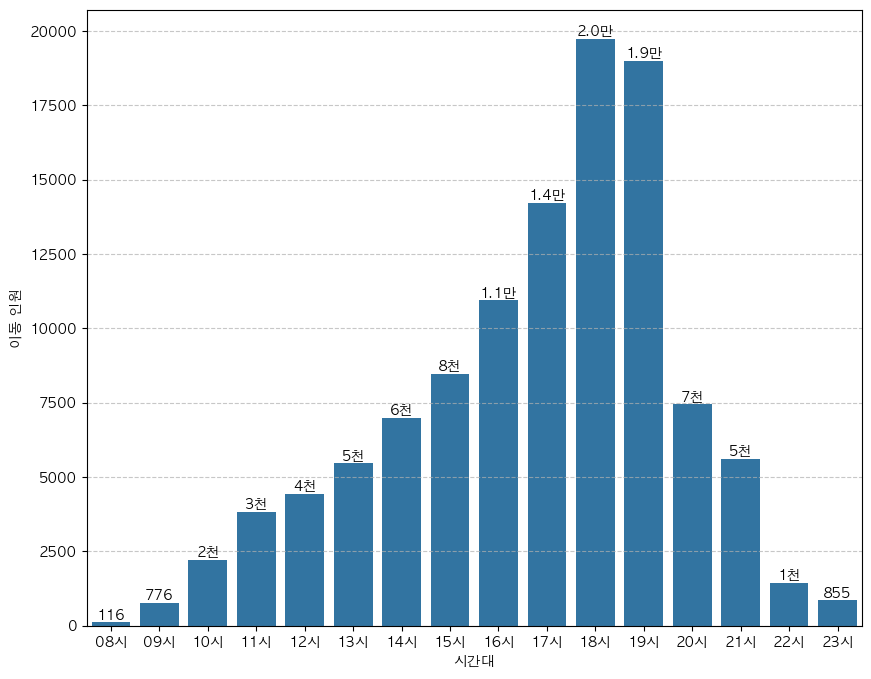

In [141]:
# 시간대별 이동 인원 시각화
plt.figure(figsize=(10, 8))

for index, value in enumerate(visit_counts['od_cnts']):
    if value >= 10000:
        plt.text(index, value, f'{value / 10000:.1f}만', ha='center', va='bottom', color='black')
    elif value >= 1000:
        plt.text(index, value, f'{int(value / 1000)}천', ha='center', va='bottom', color='black')
    else:
        plt.text(index, value, f'{int(value)}', ha='center', va='bottom', color='black')

plt.xlabel('시간대')
plt.ylabel('이동 인원')
sns.barplot(x=visit_counts['end_time'], y=visit_counts['od_cnts'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig('시간대별 이동인원.png', dpi=300, bbox_inches='tight')
plt.show()

=> 퇴근 시간을 고려하여도 불꽃놀이의 시작이 7시이므로 축제 장소인 여의도로 이동한 인원이 매우 많음을 알 수 있음

## 2. 축제 장소에서의 체류 인원 분석 (stay 데이터)

In [32]:
# 2023년 10월 7일 여의도 체류 인원 확인
df_stay_1007 = pd.read_csv('data/stay_20231001_15/stay_20231007_1.csv')

### 1) 시간대별 여의도 체류 인원 파악

In [34]:
# 여의도 체류 인원 데이터
target_stay = get_target_data(df_stay_1007, target_code, 'hdong_cd', 'purpose')
target_stay.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts
322,1156054000,20231007,13:00,0,1,5,2039
1081,1144058500,20231007,18:00,0,3,3,924
1422,1144068000,20231007,20:00,1,0,5,748
3492,1117064000,20231007,19:00,0,0,5,1350
5232,1144065500,20231007,20:00,1,2,5,927


In [35]:
stay_counts = target_stay.groupby('time')['stay_cnts'].sum().reset_index()

# 시간대를 "00:00" 형식에서 "00시" 형식으로 변경
stay_counts['time'] = pd.to_datetime(stay_counts['time'], format='%H:%M').dt.strftime('%H시')

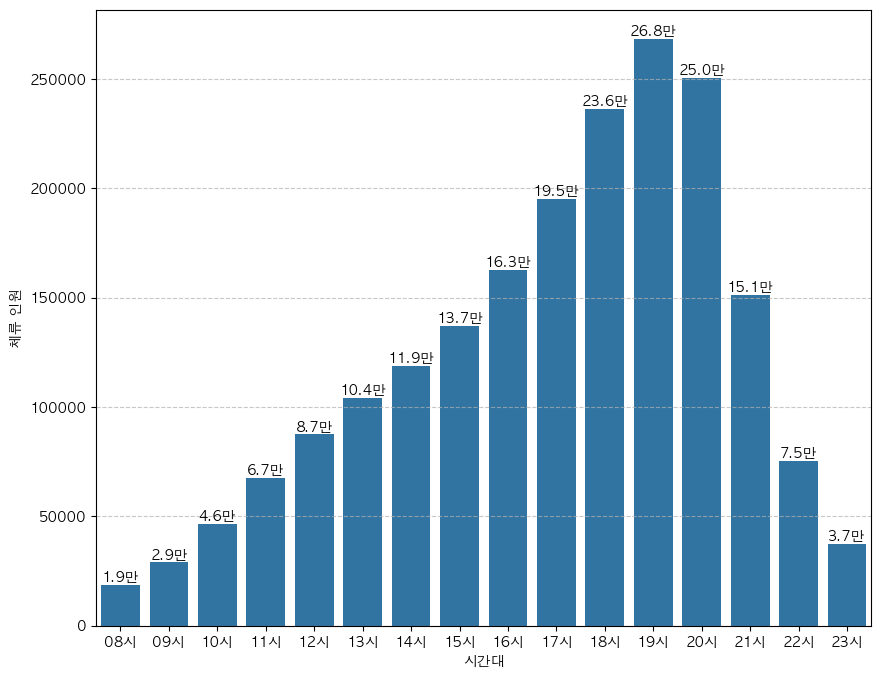

In [145]:
# 시간대별 체류 인원 시각화
plt.figure(figsize=(10, 8))

for index, value in enumerate(stay_counts['stay_cnts']):
    plt.text(index, value, f'{value / 10000:.1f}만', ha='center', va='bottom', color='black')

plt.xlabel('시간대')
plt.ylabel('체류 인원')
sns.barplot(x=stay_counts['time'], y=stay_counts['stay_cnts'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig('시간대별 체류인원.png', dpi=300, bbox_inches='tight')
plt.show()

=> 불꽃축제 시간에 여의도 내 체류인원이 급증하는 것을 파악함

## 3. 2023 서울세계불꽃축제 방문객 군집분석

In [39]:
od_cluster = target_od.copy()
od_cluster.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
186,1144066000,1144068000,20231007,18:00,20:00,1,2,0.0,5.0,5,40620,100,9
471,1129061000,1144058500,20231007,13:00,14:00,1,0,0.0,0.0,3,32716,79,30
498,1144059000,1117057000,20231007,19:00,20:00,1,1,0.0,3.0,3,45789,60,8
749,1117064000,1117063000,20231007,18:00,18:00,1,4,0.0,5.0,5,3926,6,7
921,1156054000,1144058500,20231007,20:00,21:00,1,4,1.0,3.0,3,38561,32,8


In [40]:
# 지역명 할당
cluster_location_code_list = od_cluster[['origin_hdong_cd']]
origin_dest_location = get_location(df_location, cluster_location_code_list)
od_cluster['origin_location_name'] = origin_dest_location['origin_location_name']
od_cluster.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,origin_location_name
186,1144066000,1144068000,20231007,18:00,20:00,1,2,0.0,5.0,5,40620,100,9,서울특별시
471,1129061000,1144058500,20231007,13:00,14:00,1,0,0.0,0.0,3,32716,79,30,서울특별시
498,1144059000,1117057000,20231007,19:00,20:00,1,1,0.0,3.0,3,45789,60,8,서울특별시
749,1117064000,1117063000,20231007,18:00,18:00,1,4,0.0,5.0,5,3926,6,7,서울특별시
921,1156054000,1144058500,20231007,20:00,21:00,1,4,1.0,3.0,3,38561,32,8,서울특별시


In [41]:
od_cluster = od_cluster.drop(columns=['origin_hdong_cd', 'dest_hdong_cd', 'date'])
od_cluster['modal'] = od_cluster['modal'].astype(int)
od_cluster['origin_purpose'] = od_cluster['origin_purpose'].astype(int)

In [42]:
# 시간대 분류 오전(0),오후(1)
od_cluster['start_time'] = od_cluster['start_time'].apply(lambda x: 0 if pd.to_datetime(x).hour < 12 else 1)
od_cluster['end_time'] = od_cluster['end_time'].apply(lambda x: 0 if pd.to_datetime(x).hour < 12 else 1)
od_cluster.head()

,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,origin_location_name
186,1,1,1,2,0,5,5,40620,100,9,서울특별시
471,1,1,1,0,0,0,3,32716,79,30,서울특별시
498,1,1,1,1,0,3,3,45789,60,8,서울특별시
749,1,1,1,4,0,5,5,3926,6,7,서울특별시
921,1,1,1,4,1,3,3,38561,32,8,서울특별시


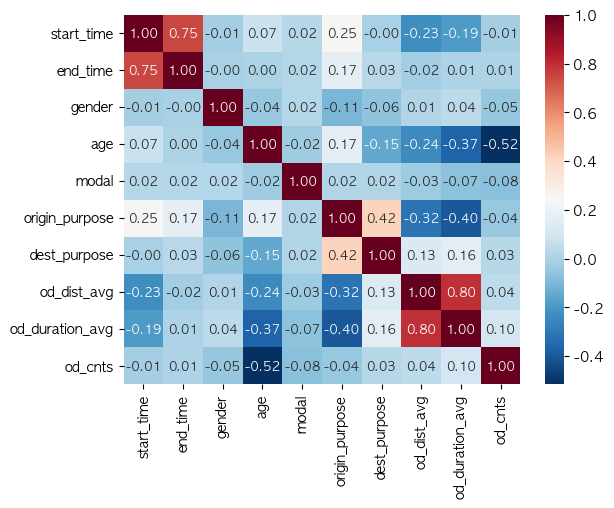

In [43]:
od_cluster_corr = od_cluster.drop(columns=['origin_location_name']).corr(method='pearson')
sns.heatmap(od_cluster_corr, cmap='RdBu_r', annot=True, annot_kws={"size": 9}, fmt=".2f")
plt.show()

In [44]:
od_cluster = pd.get_dummies(od_cluster, columns=['age', 'modal', 'origin_purpose', 'dest_purpose', 'origin_location_name'], dtype=int)
od_cluster.head()

,start_time,end_time,gender,od_dist_avg,od_duration_avg,od_cnts,age_0,age_1,age_2,age_3,...,origin_location_name_대전광역시,origin_location_name_부산광역시,origin_location_name_서울특별시,origin_location_name_세종특별자치시,origin_location_name_인천광역시,origin_location_name_전라남도,origin_location_name_전라북도,origin_location_name_제주특별자치도,origin_location_name_충청남도,origin_location_name_충청북도
186,1,1,1,40620,100,9,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
471,1,1,1,32716,79,30,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
498,1,1,1,45789,60,8,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
749,1,1,1,3926,6,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
921,1,1,1,38561,32,8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


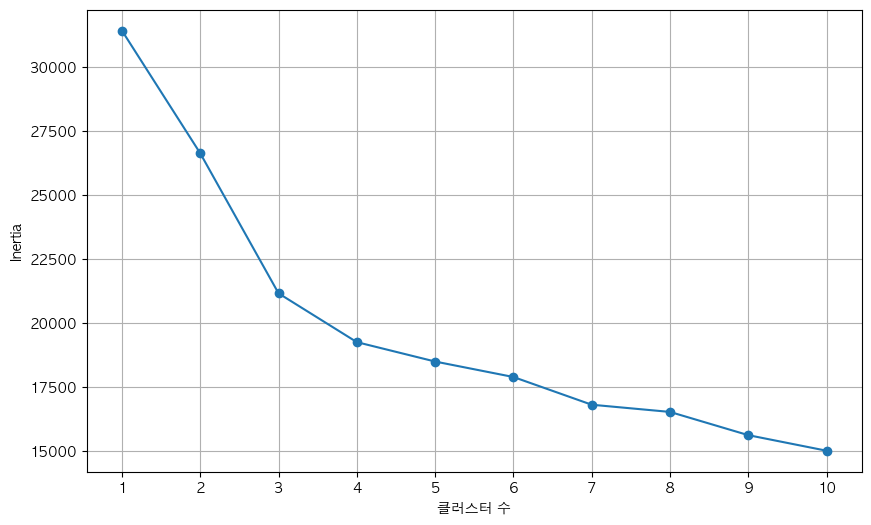

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

X = od_cluster

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 클러스터 수 찾기 (엘보우 방법)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# K 설정
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
od_cluster['label'] = kmeans.fit_predict(X_scaled)

# 실루엣 점수 계산
score = silhouette_score(X_scaled, od_cluster['label'])
score

0.2356079987328133

In [47]:
# 숫자형 데이터 평균 계산
od_cluster_numeric = od_cluster[['od_dist_avg', 'od_duration_avg', 'label']]
summary = od_cluster_numeric.groupby('label').mean()
summary

,od_dist_avg,od_duration_avg
label,,
0,109703.329259,125.039725
1,20049.198760,33.645195
2,24148.542450,38.827933
3,46750.014988,64.584929


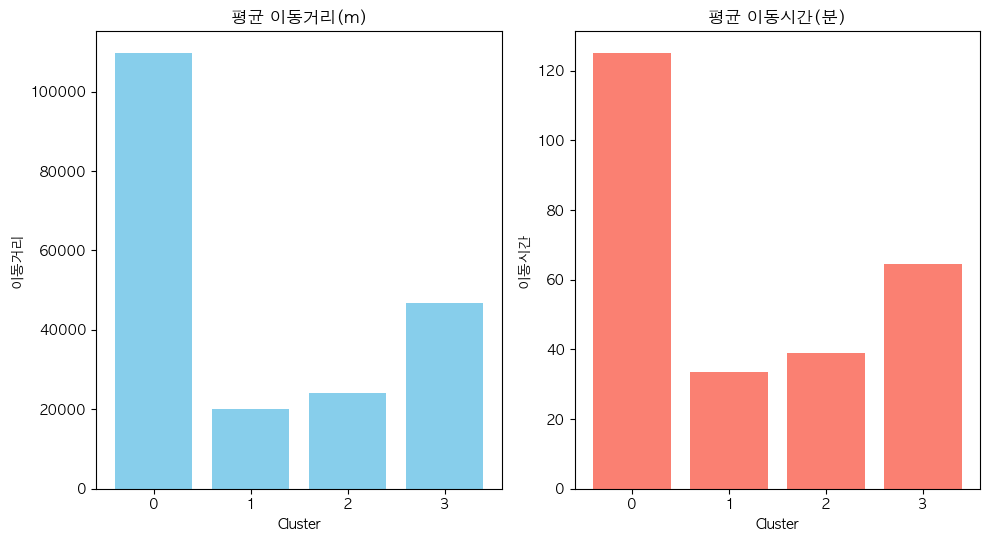

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 평균 이동거리
axs[0].bar(summary.index, summary['od_dist_avg'], color='skyblue')
axs[0].set_title('평균 이동거리(m)')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('이동거리')
axs[0].set_xticks(summary.index)

# 평균 이동시간
axs[1].bar(summary.index, summary['od_duration_avg'], color='salmon')
axs[1].set_title('평균 이동시간(분)')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('이동시간')
axs[1].set_xticks(summary.index)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [49]:
# 1. 군집별 성별 비율
gender_counts = od_cluster.groupby(['label', 'gender']).size().unstack(fill_value=0)
gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0)

# 2. 군집별 나이 비율
age_columns = [col for col in od_cluster.columns if 'age_' in col]
age_proportions = od_cluster.groupby('label')[age_columns].mean()

# 3. 군집별 이동수단 비율
modal_columns = [col for col in od_cluster.columns if 'modal_' in col]
modal_proportions = od_cluster.groupby('label')[modal_columns].mean()

# 4. 군집별 지역 비율
location_columns = [col for col in od_cluster.columns if 'origin_location_name_' in col]
location_proportions = od_cluster.groupby('label')[location_columns].mean()

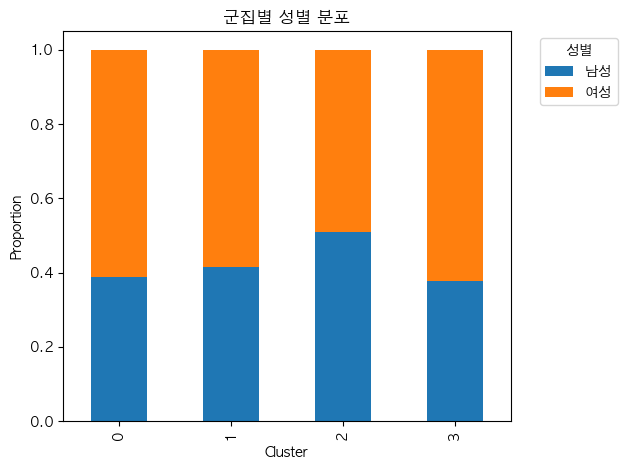

In [50]:
# 성별 매핑
gender_labels = {
    0: '남성',
    1: '여성'
}

# 성별 비율 스택형 바 차트 그리기
ax = gender_proportions.plot(kind='bar', stacked=True)

# 그래프 제목 및 축 레이블 설정
plt.title('군집별 성별 분포')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

# 범례 설정
ax.legend([gender_labels[i] for i in range(len(gender_labels))], 
          title="성별", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()  # 그래프 요소가 잘리지 않도록 레이아웃 조정
plt.show()

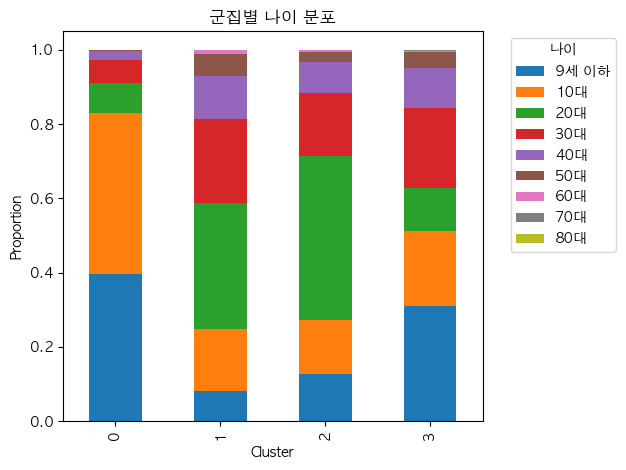

In [51]:
# 나이 매핑
age_labels = {
    0: '9세 이하',
    1: '10대',
    2: '20대',
    3: '30대',
    4: '40대',
    5: '50대',
    6: '60대',
    7: '70대',
    8: '80대'
}

# 나이 비율 스택형 바 차트 그리기
ax = age_proportions.plot(kind='bar', stacked=True)

# 그래프 제목 및 축 레이블 설정
plt.title('군집별 나이 분포')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

# 범례 설정
ax.legend([age_labels[i] for i in range(len(age_labels))], 
          title="나이", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()  # 그래프 요소가 잘리지 않도록 레이아웃 조정
plt.show()

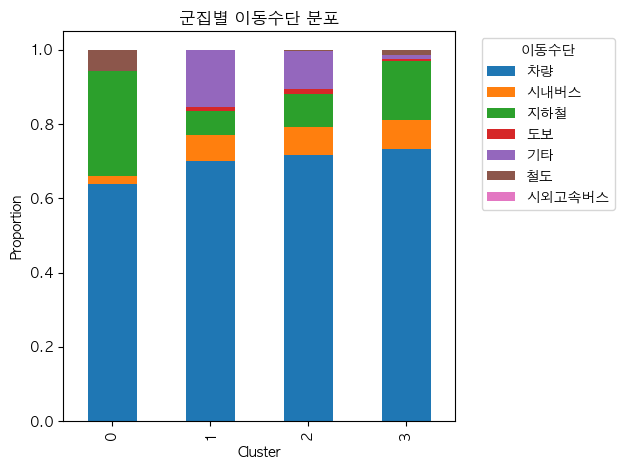

In [52]:
# 이동수단 이름 매핑
modal_labels = {
    0: '차량',
    1: '시내버스',
    2: '지하철',
    3: '도보',
    4: '기타',
    5: '철도',
    6: '시외고속버스',
    7: '항공기'
}

# 이동수단 비율 스택형 바 차트 그리기
ax = modal_proportions.plot(kind='bar', stacked=True)

# 그래프 제목 및 축 레이블 설정
plt.title('군집별 이동수단 분포')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

# 범례 설정
# 이동수단 이름으로 설정
ax.legend([modal_labels[i] for i in range(len(modal_labels))], 
          title="이동수단", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()  # 그래프 요소가 잘리지 않도록 레이아웃 조정
plt.show()

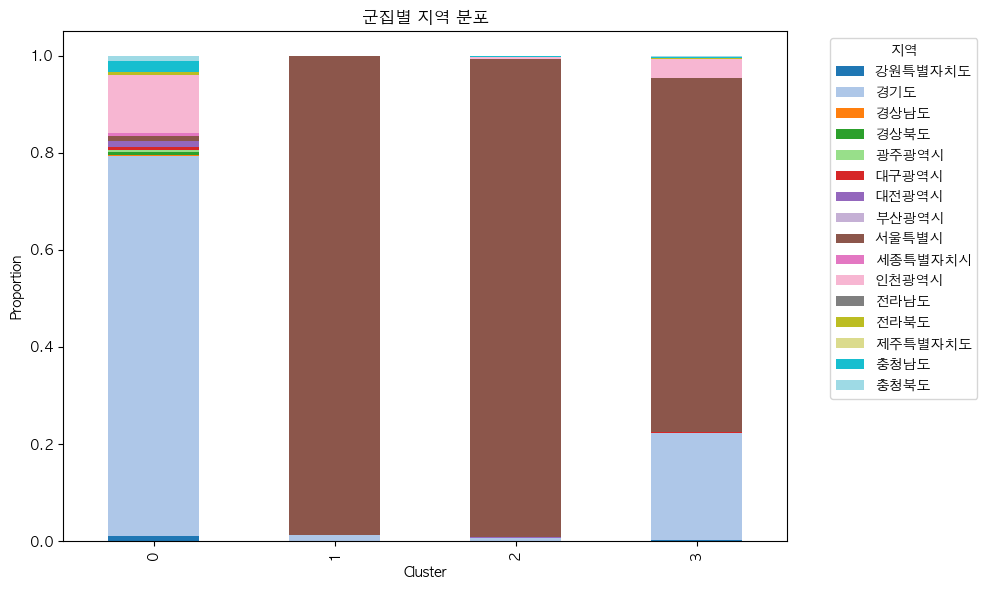

In [53]:
location_columns = [col for col in od_cluster.columns if col.startswith('origin_location_name_')]
location_labels = {col: col.split('_')[-1] for col in location_columns}

ax = location_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('군집별 지역 분포')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

ax.legend([location_labels[col] for col in location_columns], 
          title="지역", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

실루엣 점수 :  0.5969201289442719


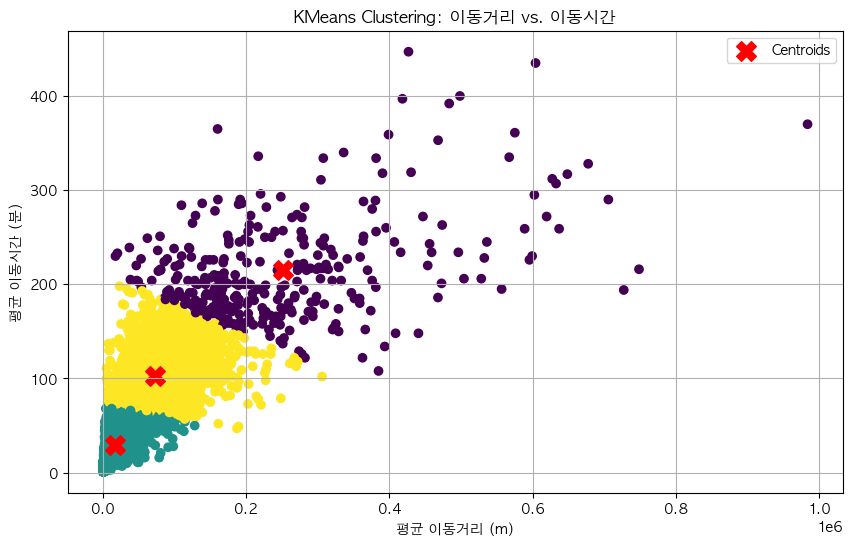

In [54]:
# 이동거리와 시간으로 군집분석 시각화
X = od_cluster[['od_dist_avg', 'od_duration_avg']]

X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
od_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# 실루엣 점수 계산
score = silhouette_score(X_scaled, od_cluster['cluster'])
print('실루엣 점수 : ', score)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(od_cluster['od_dist_avg'], od_cluster['od_duration_avg'], c=od_cluster['cluster'], cmap='viridis', marker='o')

# 군집 중심 표시
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

# 그래프 제목 및 레이블 설정
plt.title('KMeans Clustering: 이동거리 vs. 이동시간')
plt.xlabel('평균 이동거리 (m)')
plt.ylabel('평균 이동시간 (분)')
plt.legend()
plt.grid()
plt.show()